In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_sudeste_realista_outliers-1K.csv")

In [3]:
df['feedback'] = df['feedback'].fillna("Desconhecido")

In [4]:
df['feedback_Bom'] = (df['feedback'] == 'Bom').astype(int)

In [5]:
df.head(5)

,id,idade,renda,cidade,categoria,nota,feedback,feedback_Bom
0,1,33.0,23998.60,São Paulo,B,5.4,Bom,1
1,2,30.0,32347.35,Vitória,A,7.3,Bom,1
2,3,27.0,19521.96,São Paulo,B,6.2,Bom,1
3,4,54.0,3828.07,Vitória,A,6.3,Bom,1
4,5,61.0,39322.37,Vitória,A,5.9,Bom,1


In [6]:
df['feedback'] = df['feedback'].fillna("Desconhecido")
df['categoria'] = df['categoria'].fillna("Desconhecido")
df['idade'] = df['idade'].fillna(df['idade'].median())
df['renda'] = df['renda'].fillna(df['renda'].mean())
df['nota']  = df['nota'].fillna(df['nota'].median())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   idade         1000 non-null   float64
 2   renda         1000 non-null   float64
 3   cidade        992 non-null    object 
 4   categoria     1000 non-null   object 
 5   nota          1000 non-null   float64
 6   feedback      1000 non-null   object 
 7   feedback_Bom  1000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

id              0
idade           0
renda           0
cidade          8
categoria       0
nota            0
feedback        0
feedback_Bom    0
dtype: int64

In [9]:
df.to_csv("dataset_tratado_sudeste_realista_outliers-1K-pytorch.csv")

In [10]:
features = df[['idade', 'renda', 'nota']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [11]:
target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: feedback_Bom, dtype: int64

In [12]:
X_test.head(5)

,idade,renda,nota
521,63.0,31737.90,8.7
737,29.0,12703.65,8.8
740,16.0,36561.24,9.2
660,63.0,23727.93,7.1
411,68.0,31441.84,6.7


In [13]:
y_test.head(5)

521    1
737    1
740    1
660    1
411    1
Name: feedback_Bom, dtype: int64

In [14]:
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [15]:
print(X_train_t.shape) 
print(y_train_t.shape) 

torch.Size([700, 3])
torch.Size([700, 1])


In [16]:
print(X_train_t) 

tensor([[7.1000e+01, 3.9584e+04, 5.2000e+00],
        [4.9000e+01, 2.4594e+04, 7.7000e+00],
        [6.0000e+01, 6.8472e+03, 5.8000e+00],
        ...,
        [1.9000e+01, 2.2166e+04, 6.1000e+00],
        [5.9000e+01, 3.2601e+04, 9.3000e+00],
        [4.6000e+01, 3.5381e+04, 6.5000e+00]])


In [17]:
print(y_train_t) 

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [18]:
print(X_test_t)

tensor([[6.3000e+01, 3.1738e+04, 8.7000e+00],
        [2.9000e+01, 1.2704e+04, 8.8000e+00],
        [1.6000e+01, 3.6561e+04, 9.2000e+00],
        [6.3000e+01, 2.3728e+04, 7.1000e+00],
        [6.8000e+01, 3.1442e+04, 6.7000e+00],
        [4.9000e+01, 2.0582e+04, 5.8000e+00],
        [3.7000e+01, 4.2118e+04, 8.6000e+00],
        [2.4000e+01, 2.8427e+04, 5.5000e+00],
        [5.9000e+01, 1.9698e+03, 8.6000e+00],
        [8.1000e+01, 4.6288e+03, 6.3000e+00],
        [4.2000e+01, 4.6088e+04, 6.3000e+00],
        [6.0000e+01, 2.3601e+04, 1.0000e+01],
        [7.1000e+01, 2.5653e+04, 6.7000e+00],
        [1.8000e+01, 1.2303e+04, 5.4000e+00],
        [6.4000e+01, 2.1941e+04, 7.9000e+00],
        [7.7000e+01, 4.4281e+04, 5.1000e+00],
        [5.6000e+01, 2.3974e+04, 7.5000e+00],
        [1.7000e+01, 1.9749e+04, 5.2000e+00],
        [6.8000e+01, 4.1412e+04, 7.3000e+00],
        [7.9000e+01, 3.7238e+04, 7.2000e+00],
        [4.8000e+01, 4.0056e+03, 8.7000e+00],
        [1.7000e+01, 4.3584e+03, 7

In [19]:
print(y_test_t)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [20]:
class SimpleNet(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNet, self).__init__()
        self.linear1 = nn.Linear(input_dim, 8)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [21]:
input_dim = X_train_t.shape[1]  # Quantidade de colunas em X
model = SimpleNet(input_dim)

In [22]:
print (input_dim)

3


In [23]:
print(model)

SimpleNet(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)


In [24]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [25]:
# Qt de fases de treinamenro
epochs = 100
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 2 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")



Época [2/100], Perda Treino: 48.7273
Época [4/100], Perda Treino: 35.8864
Época [6/100], Perda Treino: 23.0506
Época [8/100], Perda Treino: 10.2094
Época [10/100], Perda Treino: 89.3829
Época [12/100], Perda Treino: 3.7202
Época [14/100], Perda Treino: 9.9598
Época [16/100], Perda Treino: 14.7676
Época [18/100], Perda Treino: 18.4300
Época [20/100], Perda Treino: 21.1586
Época [22/100], Perda Treino: 23.1194
Época [24/100], Perda Treino: 24.4419
Época [26/100], Perda Treino: 25.2312
Época [28/100], Perda Treino: 25.5727
Época [30/100], Perda Treino: 25.5373
Época [32/100], Perda Treino: 25.1836
Época [34/100], Perda Treino: 24.5608
Época [36/100], Perda Treino: 23.7098
Época [38/100], Perda Treino: 22.6652
Época [40/100], Perda Treino: 21.4560
Época [42/100], Perda Treino: 20.1065
Época [44/100], Perda Treino: 18.6371
Época [46/100], Perda Treino: 17.0649
Época [48/100], Perda Treino: 15.4042
Época [50/100], Perda Treino: 13.6669
Época [52/100], Perda Treino: 11.8627
Época [54/100], Pe

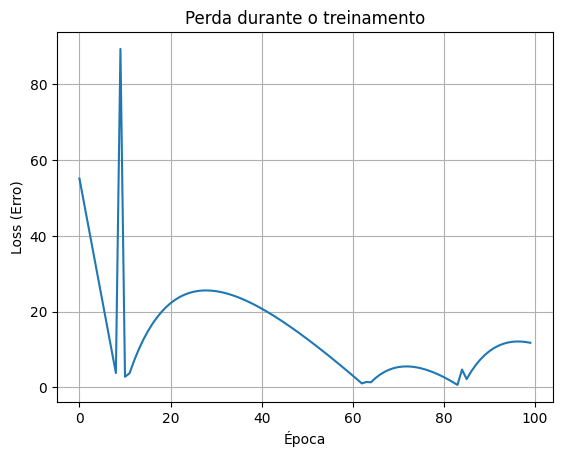

In [26]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [28]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 300.00
Qtde de Acertos: 284.00
Acurácia no teste:  94.67%
